# Taller de Regresión Lineal

En esta clase desarrollaremos varios modelos de Clasificación lineal de dos clases y multiclase.

## Clasificación lineal de dos clases

Se tiene datos del Iris datase, que puede encontrarse en este [link](https://archive.ics.uci.edu/ml/datasets/iris). El objetivo con este dataset es tratar de identificar el tipo de flor en función de 4 parámetros. Para este primer ejemplo vamos a utilizar solamente los dos primerosrelacionados con el ancho y el largo del sépalo de la flor.

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np
from sklearn import datasets

In [15]:
# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features
y = iris.target

De los datos cargados seleccione solamente las clases 0 y 1, y grafiquelas resaltando las dos clases. ‚Qué puede decir de los datos para cada clase?

In [28]:
X2 = X[:100, :]  # we only take the first 100 elements since they represent only 2 categories
y2 = iris.target[:100]

### Regresión Logistica Lineal

Implemente un modelo de regresión logística qu epermita clasificar las clases 0 y 1. Una vez el modelo este entrenado gráfique los datos y las regiones de clasificación. Para gráficar las regiones de clasificación, debe evaluar el modelo en una rejilla de datos, de tal forma que se cubra todos los valores que toman las caracteristicas. Para tener una transición suave entre las clases no grafique la clase sino la salida directa del modelo. Esta grafica la puede usar utilizando un mapa de calor. Esto lo puede hacer con la función heatmap de seaborn. ¿Qué conluye de este clasificador?

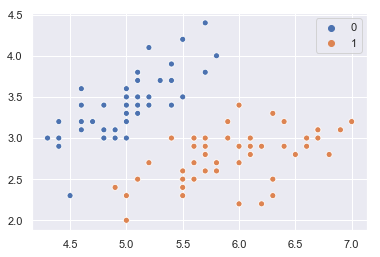

In [34]:
# Grafica de los datos
sns.scatterplot(x=X2[:,0],y=X2[:,1],hue=y2)

Para hacer la regresión logística nos inspiraremos de la implementación de la regresión lineal y del gradiente descendiente.

## Funcion de costo para regresión logística
La función de costo $J(\Theta)$ para la regresión logística es igual a :
$$
J(\Theta) = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}log(h_{\theta}(\boldsymbol{x^{(i)}}) + (1-y^{(i)})log(1-h_{\theta}(\boldsymbol{x^{(i)}})
$$

In [49]:
# Vectorizamos la funcion logistica para que la aplique termino a termino en un arreglo.
def g(z):
    return(1/(1+np.exp(-z)))
logit = np.vectorize(g)

## Implementación de la función de costo

In [59]:
def J_logit(theta,X,y):
    """
    Calcula la función de costo para la regresión logística
    
    args:
        theta: vector de coeficientes de los regresores (el primero es el independiente)
        X: matriz de datos
        y: valores de la variable respuesta
    
    returns:
    El valor de la función de costo para los parametros theta dados
    """
    m = len(X)
    A = np.concatenate([np.ones([m,1]),X],axis=1)
    h = logit(np.matmul(A,theta)) # aplicamos la funcion logistica a cada termino del vector A*theta
    # NOTA: es suma o resta?
    res =  -(1/m)*sum(np.multiply(y,np.log(h)) + np.multiply((np.ones([m,1])- y),np.log(np.ones([m,1])-h)) )
    return res[0]

In [67]:
# Pruebas de que la funcion de costo es correcta
theta = np.random.rand(X2.shape[1]+1,1)
costo = J_logit(theta,X2,y2)

## Gradiente descendiente

In [65]:
def grad_descent(X,y,alfa,epochs,J,g):
    """
  Calcula el gradiente para encontrar los parametros optimos theta.

  args:
    X: matriz de datos
    y: valores de la variable respuesta
    alfa: tasa de aprendizaje
    epochs: numero de actualizaciones de los parametros theta
    J: funcion de costo
    g: función que se le aplica a theta^T * X

  returns:
    vector theta con valores optimos theta que minimizan la funcion de costo y lista con el costo calculado dados unos parametros theta
    """
    m = len(X)
    y = np.reshape(y,[m,1])
    # la primera columna es de 1
    A = np.concatenate([np.ones([m,1]),X],axis=1)   
    # inicializacion aleatoria de coeficientes
    theta = np.random.rand(A.shape[1],1)
    print("Theta inicial:")
    print(theta)
    costo = []
    h = g(np.matmul(A,theta)) 
    new_theta = np.copy(theta)
    for k in range(epochs):
        for p in range(len(theta)):
            if p == 0:
                new_theta[p][0] = new_theta[p][0] - alfa*(1/m)*sum(h-y)
            else:
                new_theta[p][0] = new_theta[p][0] - alfa*(1/m)*sum(np.multiply(h-y,np.reshape(X[:,p-1],[m,1])))
        costo.append(J(new_theta,X,y))
        h = g(np.matmul(A,new_theta))
    return new_theta, costo


## Prueba de gradiente descendiente con regresión logística

In [69]:
best_theta, cost = grad_descent(X2,y2,0.5,30,J_logit,logit)
print("Optimal theta:")
print(best_theta)

Theta inicial:
[[0.15991146]
 [0.8501641 ]
 [0.58186934]]
Optimal theta:
[[-0.15448416]
 [ 2.517569  ]
 [-2.68883989]]


In [78]:
# Funcion de prediccion h_theta
# NOTA: como sé a qué grupo pertenece si supera 0.5 o no?
# ESTA MAL
def predict(X,theta):
    A = np.concatenate([np.ones([len(X),1]),X], axis=1)
    print("A")
    print(A)
    h = logit(np.matmul(A,theta))
    print("h:")
    print(h)
    y_pred = np.where(h >= 0.5)
    return y_pred
    

In [79]:
# prueba de funcion predict
y_pred = predict(X,best_theta)
y_pred

A
[[1.  5.1 3.5]
 [1.  4.9 3. ]
 [1.  4.7 3.2]
 [1.  4.6 3.1]
 [1.  5.  3.6]
 [1.  5.4 3.9]
 [1.  4.6 3.4]
 [1.  5.  3.4]
 [1.  4.4 2.9]
 [1.  4.9 3.1]
 [1.  5.4 3.7]
 [1.  4.8 3.4]
 [1.  4.8 3. ]
 [1.  4.3 3. ]
 [1.  5.8 4. ]
 [1.  5.7 4.4]
 [1.  5.4 3.9]
 [1.  5.1 3.5]
 [1.  5.7 3.8]
 [1.  5.1 3.8]
 [1.  5.4 3.4]
 [1.  5.1 3.7]
 [1.  4.6 3.6]
 [1.  5.1 3.3]
 [1.  4.8 3.4]
 [1.  5.  3. ]
 [1.  5.  3.4]
 [1.  5.2 3.5]
 [1.  5.2 3.4]
 [1.  4.7 3.2]
 [1.  4.8 3.1]
 [1.  5.4 3.4]
 [1.  5.2 4.1]
 [1.  5.5 4.2]
 [1.  4.9 3.1]
 [1.  5.  3.2]
 [1.  5.5 3.5]
 [1.  4.9 3.1]
 [1.  4.4 3. ]
 [1.  5.1 3.4]
 [1.  5.  3.5]
 [1.  4.5 2.3]
 [1.  4.4 3.2]
 [1.  5.  3.5]
 [1.  5.1 3.8]
 [1.  4.8 3. ]
 [1.  5.1 3.8]
 [1.  4.6 3.2]
 [1.  5.3 3.7]
 [1.  5.  3.3]
 [1.  7.  3.2]
 [1.  6.4 3.2]
 [1.  6.9 3.1]
 [1.  5.5 2.3]
 [1.  6.5 2.8]
 [1.  5.7 2.8]
 [1.  6.3 3.3]
 [1.  4.9 2.4]
 [1.  6.6 2.9]
 [1.  5.2 2.7]
 [1.  5.  2. ]
 [1.  5.9 3. ]
 [1.  6.  2.2]
 [1.  6.1 2.9]
 [1.  5.6 2.9]
 [1.  6.7 3.1]
 [1.  5.

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

### Regresión Logistica No Lineal

Realice una regresion logistica con un polinomio de orden 5. Gráfique los datos y las regiones de decision de la misma forma qu een el caso anterior. ¿Qué puede concluir?

## Clasificación Logistica Multiclase


### Regresión lineal multiclase

Realicé una regresion logistica lineal utilizando las mismas dos columnas de entrada, pero en este caso se requiere clasificar los tres tipos de flores en el dataset. Para lo cual debe realizar tres clasificadores y combinar sus salidas.

Grafique los datos y las regiones de decision, para calcular las regiones de decision deben calcularlas para los tres clasificadores, y luego combinarlas de tal forma que la salida este determinada por el elemnto donde la probabilidad es mayor. Una vez hecho esto y se haya codificado esta información en una mattriz, ahi se puede gráficar como un mapa de calor.


### Regresión no lineal multiclase (Tarea)

Utilice todos los datos de entrada para el clasificador, implemente una regresion de orden 10. ¿Cómo podría representar las regiones de decisión en una gráfica? ¿Cómo evaluo que tan bueno es el modelo?


### Toy Example

Realiza una clasificación para las tres clases que se encuentran en el archivo Toy_example.csv. Las dos primeras columnas corresponden a las caracteristicas y la última columna corresponde al label de la clase. Al realizar la clasificación, grafique los datos y las regiones de decisión. Además realice une nueva gráfica donde no se grafique la probabilidad de las regiones de decisión, sino la clase a la qyue pertenece cada elemento, es decir un mapa de color con tres colores, uno para la clase 0, uno para la clase 1, y uno para la clase 2.